In [13]:
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import trailing
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [14]:
df = pd.read_csv('GOOG.csv')


In [15]:
data = df['close'].values.reshape(-1, 1)


In [16]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [17]:
train_size = int(len(data) * 0.80)
train_data, test_data = data[:train_size], data[train_size:]

In [18]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [19]:
seq_length = 10  # You can adjust this sequence length
train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
model.fit(train_sequences, train_data[seq_length:], epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 2s 8ms/step - loss: 0.0406
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 3.8800e-04
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 2.7140e-04
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 2.6864e-04
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 2.5379e-04
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 2.6621e-04
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 2.5853e-04
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 2.4818e-04
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 2.4321e-04


In [23]:
predicted_data = model.predict(test_sequences)


8/8 [==============================] - 0s 3ms/step


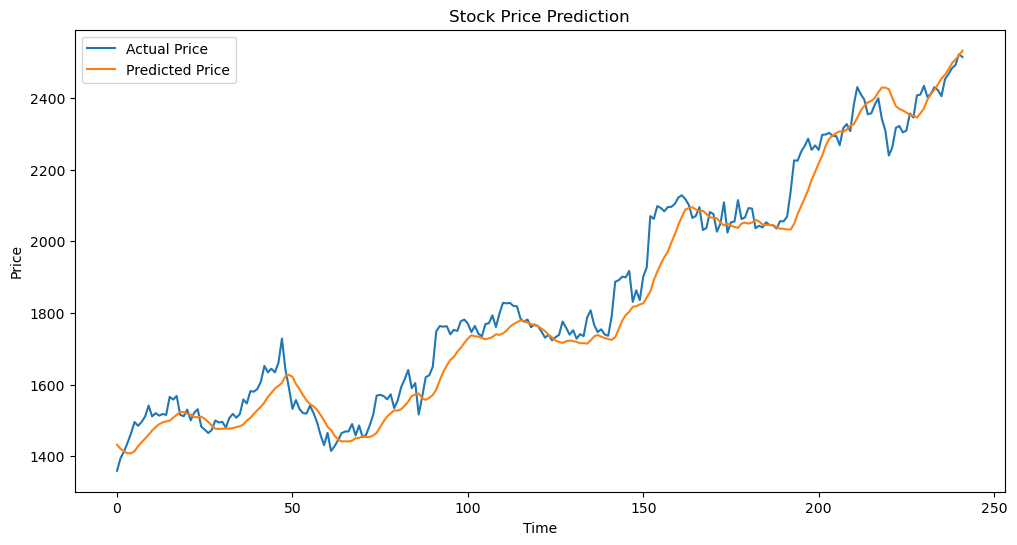

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(test_data[seq_length:]), label='Actual Price')
plt.plot(scaler.inverse_transform(predicted_data), label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()